## Lecture 2

## Matrix Operations - Review 

### We first construct our matrices 

In [27]:
A <- matrix(c(1:4), nrow = 2, ncol = 2)
head(A)

1,3
2,4


In [28]:
B <- matrix(c(6:9), nrow = 2, ncol = 2)
head(B)

6,8
7,9


### Multiply Matrices 

In [29]:
C = A*B ## Component wise multiplication

The above expression performs a component wise operation: 
$$
C_{i,j} = A_{i,j} \times  B_{i,j}
$$

Note: this is different from the results obtained from matrix multiplication!

In [30]:
head(C)

6,24
14,36


### Trasponse: flips the matrix over the diagonal

In [31]:
head(t(C))

6,14
24,36


### Matrix Multiplication



In [32]:
C = A%*%B
head(C)

27,35
40,52


It is not commutative! What if we invert the order of B and A? 

In [33]:
B%*%A

22,50
25,57


### Additional Examples

In [34]:
A <- matrix(c(1:4), nrow = 2, ncol = 2)
B <- matrix(c(6:11), nrow = 3, ncol = 2)
print(B)

     [,1] [,2]
[1,]    6    9
[2,]    7   10
[3,]    8   11


How do we multiply these two matrices? 

In [35]:
A%*%B

ERROR: Error in A %*% B: non-conformable arguments


In [36]:
B%*%A

24,54
27,61
30,68


## Linear model: review


Y is a vector of response variables: 
$\rightarrow Y = (y_1, y_2, ... , y_n)$

**X** is a vector of explanatory variables. 
$\rightarrow$ Data: $(y_1, x_1), (y_2, x_2), ... , (y_n, x_n)$ 



$$y_i = f(x_i) + \epsilon_i$$  

for some unknown function $f$. 


First approach to approximate $f$ with $\hat{f}$: 

$$
\underset{f}{argmin}{E[(Y - f(\textbf{X}))^2]} = E[Y|\textbf{X}]
$$
 
 
In a linear model with a single variable: 

$$
y_i = \beta_0 + \beta_1 x_i + \epsilon_i
$$

if $E[\epsilon_i | x_i ] = 0$ then: 

$$
E[y_i | x_i] = \beta_0 + \beta_1 x_i 
$$    

**Estimation of the coefficients**

Objective function:

$$
\underset{\beta_0, \beta_1}{argmin}{\sum_{i=1}^n(y_i - \beta_0 - \beta_1x_i)^2}  
$$

<img src="./image/ConvexBeta.png" width="700" height="300" alt="This is alternate text">

### Matrix notation

<br />

Y is a vector of response variables: 
$\rightarrow Y = (y_1, y_2, ... , y_n)$ 



X is a N x K matrix of explanatory variables: 

$$
X=
  \begin{bmatrix}
    1 & ... & \textbf{X}_1 & ...   \\
    1 & ... & \textbf{X}_2 & ...   \\
    : & ... & \textbf{X}_3 & ... \\
    1 & ... & \textbf{X}_n & ...  \\
  \end{bmatrix}
$$

$\hat{f}(X): \mathbb{R}^k \rightarrow \mathbb{R}$

Linear model: $E[Y|X] = \beta_0  + \beta_1 x_{1,i} + ... + \beta_k x_{k,i} = X\beta$

<br />

Objective function: 

$$
  RSS(\beta) = {(Y - X \beta)'(Y-X\beta)}  
$$



To find the minimum of the objective function: 

$$
 \frac{\partial RSS(\beta)}{\partial \beta} = 0 \Rightarrow \hat{\beta}^{OLS} = (X^TX)^{-1}(X^TY)
$$




### Example

In [64]:
## Generate a matrix X
set.seed(123)
X <- matrix(rnorm(300), nrow = 100, ncol = 3)
head(X)

-0.56047565,-0.71040656,2.1988103
-0.23017749,0.25688371,1.3124130
1.55870831,-0.24669188,-0.2651451
0.07050839,-0.34754260,0.5431941
0.12928774,-0.95161857,-0.4143399
1.71506499,-0.04502772,-0.4762469


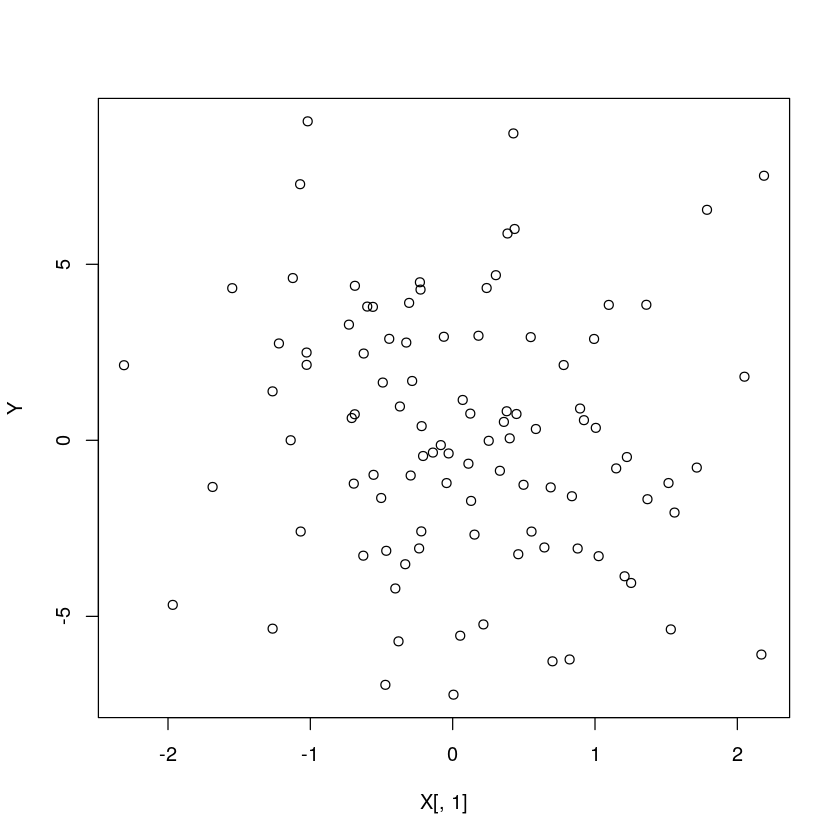

In [65]:
## Generate Y
beta <- c(0,2,3)
set.seed(124)
Y <- X%*%beta + rnorm(100)
## Plot in a scatter plot 
## Look at the first coordinate 
plot(Y ~ X[,1])

### Comment: 

- From the previous plot it seems that there is no strong relation between the first coordinate of X and Y

We now look at the third coordinate. What do you think? 

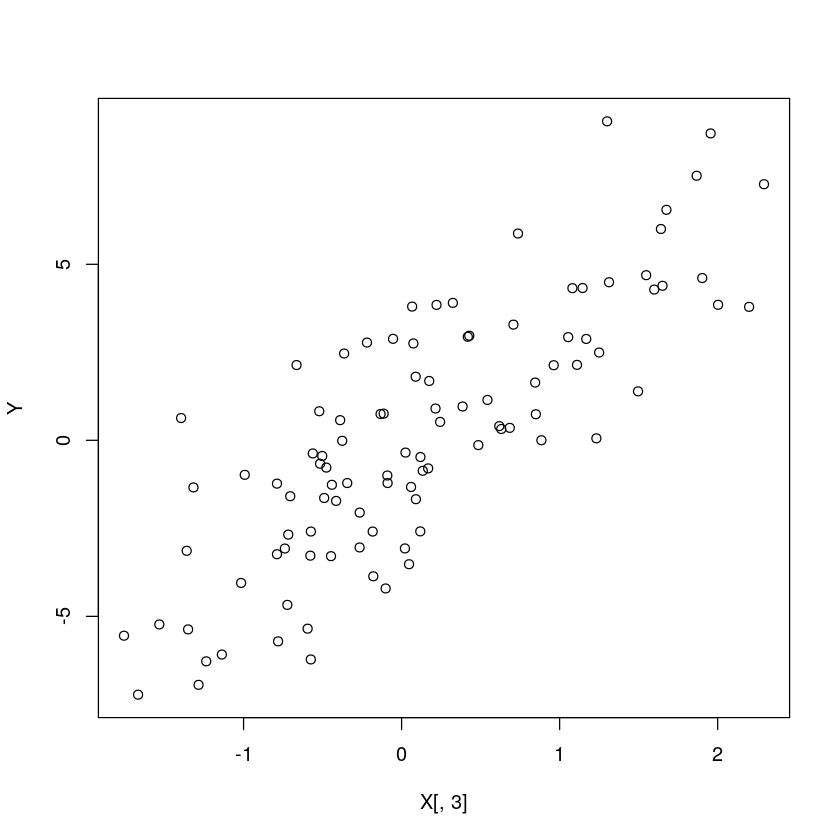

In [66]:
## Look at the third coordinate
plot(Y ~ X[,3])

### Estimate OLS

In [68]:
beta_hat  = solve(t(X)%*%X, t(X)%*%Y)
cbind(beta_hat, beta)

,beta
0.1075062,0
1.9856998,2
3.0120122,3


### Recap Previous Lecture

In [2]:
## Open the forestfirest file 
forest.fires <- read.csv('https://raw.githubusercontent.com/dviviano/ECON178_TA/master/data/forestfires.csv')
reg1 <- lm(area ~ temp, data=forest.fires)
summary(reg1)

## Estimate prediction error 

MSE <- mean((predict(reg1, newdata = forest.fires) - forest.fires$area)**2)
## Include more variables
reg2 <- lm(area ~ temp + wind + day + month, data=forest.fires)

MSE2 <- mean((predict(reg2, newdata = forest.fires) - forest.fires$area)**2)

print('MSE is:')
print(c(MSE, MSE2))


Call:
lm(formula = area ~ temp, data = forest.fires)

Residuals:
    Min      1Q  Median      3Q     Max 
 -27.34  -14.68  -10.39   -3.42 1071.33 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)  
(Intercept)  -7.4138     9.4996  -0.780   0.4355  
temp          1.0726     0.4808   2.231   0.0261 *
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 63.41 on 515 degrees of freedom
Multiple R-squared:  0.009573,	Adjusted R-squared:  0.00765 
F-statistic: 4.978 on 1 and 515 DF,  p-value: 0.0261


[1] "MSE is:"
[1] 4005.508 3935.422


### Goodness of fit

$$
\begin{equation}
    \nonumber
MSE = \frac{1}{N} \sum_{i=1}^n (y_i - \hat{y}_i)^2
\end{equation}
$$

$$
\begin{equation}
    \nonumber
R^2=  1- \frac{\sum_{i=1}^n (y_i - \hat{y}_i)^2}{\sum_{i=1}^n (y_i - \bar{y})^2} 
\end{equation}
$$

The $R^2$ reports the in-sample variance explained by the model. The higher the value the more the in-sample fit.

**Note:MSE Always decreases as we include variables. Why?**


### Better measure of predictive performance? 

1. Adjusted R-squred 

$$
\begin{equation}
    \nonumber
Adj. R^2=  1- \frac{n-1}{n-k-1}\frac{\sum_{i=1}^n (y_i - \hat{y}_i)^2}{\sum_{i=1}^n (y_i - \bar{y})^2} 
\end{equation}
$$

2. Out of sample prediction; 
3. ... .

## Note: the following material has not been covered in class

## It will be covered in the next TA session


## Class Exercise 1

We want to predict which variable are the most correlated with the balance in a bank account. 

To do so we use the credit data set (Dua, D. and Graff, C. (2019). UCI Machine Learning Repository). 
You can find the link of the data online:



- Open the dataset
- Investigate the dimension fo the dataset and the variables at disposal
- Construct a univariate regression with Balance as a function of Income






- Plot a scatter plot of the regression (Hint: use abline() to draw the regression line)
- Look at the significance of the coefficients
- Write down their interpretation



- Construct a new model including a variable you might think it is important
- Predict the Balance account with the model and compute the in-sample mean squared error>
- Repeat the process including 3, 4, 5, 8, 10 variables and draw the MSE as a function of the number of variables. Make the same plot for the R squared of each regression. What do you notice in both cases? 

## Class Exercise 2


- Pick randomly 4/5th observations from your dataset
- Construct the two following models: 
- lm(Balance $\sim$ Income + Limit + Married, data = data.tr)
- lm(Balance $\sim$ Income + Limit + Married + Gender + Ethnicity + Age + Student , data= data.tr)
- Find the MSE on the remaining 1/5th of observations

What do you notice now? 




### Solutions

[1] 400  12

[1] "X"         "Income"    "Limit"     "Rating"    "Cards"     "Age"      
 [7] "Education" "Gender"    "Student"   "Married"   "Ethnicity" "Balance"


Call:
lm(formula = Balance ~ Income, data = Credit)

Residuals:
    Min      1Q  Median      3Q     Max 
-803.64 -348.99  -54.42  331.75 1100.25 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 246.5148    33.1993   7.425  6.9e-13 ***
Income        6.0484     0.5794  10.440  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 407.9 on 398 degrees of freedom
Multiple R-squared:  0.215,	Adjusted R-squared:  0.213 
F-statistic:   109 on 1 and 398 DF,  p-value: < 2.2e-16


[1] 1.844398e-25



Call:
lm(formula = Balance ~ Income + Age, data = Credit)

Residuals:
    Min      1Q  Median      3Q     Max 
-864.15 -343.51  -51.42  317.95 1076.96 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 359.6727    70.3583   5.112 4.97e-07 ***
Income        6.2359     0.5868  10.628  < 2e-16 ***
Age          -2.1851     1.1988  -1.823   0.0691 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 406.7 on 397 degrees of freedom
Multiple R-squared:  0.2215,	Adjusted R-squared:  0.2176 
F-statistic: 56.47 on 2 and 397 DF,  p-value: < 2.2e-16


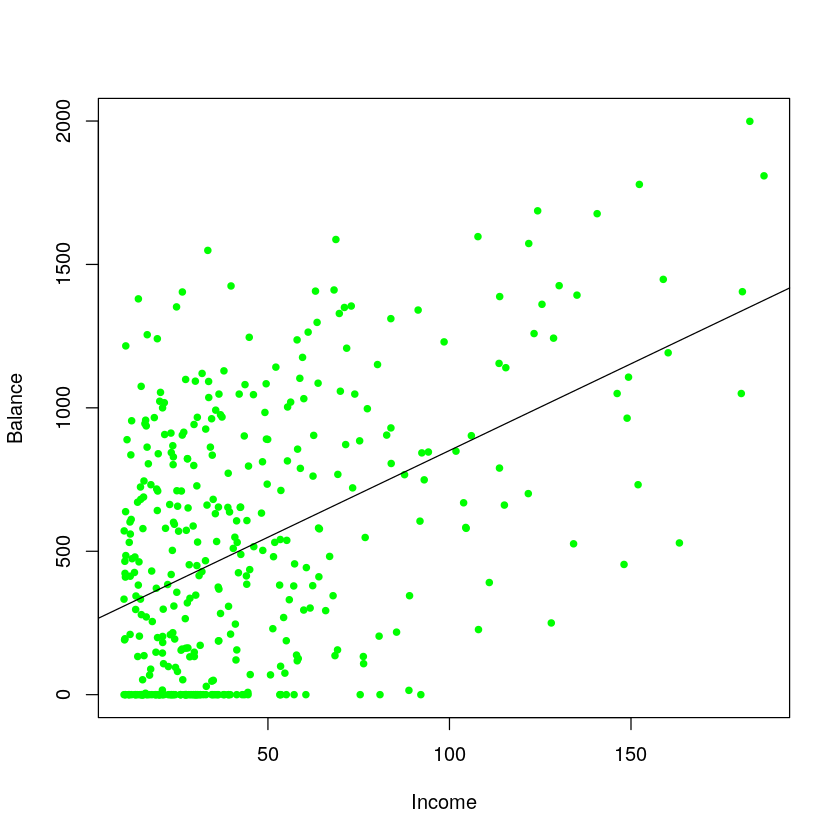

In [4]:
Credit <- read.csv("https://raw.githubusercontent.com/dviviano/ECON178_TA/master/data/Credit.csv")
dim(Credit)
names(Credit)
reg1 <- lm(Balance ~ Income, data=Credit)
plot(Balance ~ Income, data=Credit, col="green", cex=0.7, pch=19)
abline(reg1)

summary(reg1)

reg2 <- lm(Balance ~ Income + Age, data=Credit)
y_hat <- predict(reg2, newdata= Credit)
print(mean(Credit$Balance - y_hat)^2)

summary(reg2)

In [5]:
variables <- c(1,5,6,7,8,10,9,2,3,4)
mse <- rep(NA, length= 8)
r_squared <- rep(NA, length= 8)

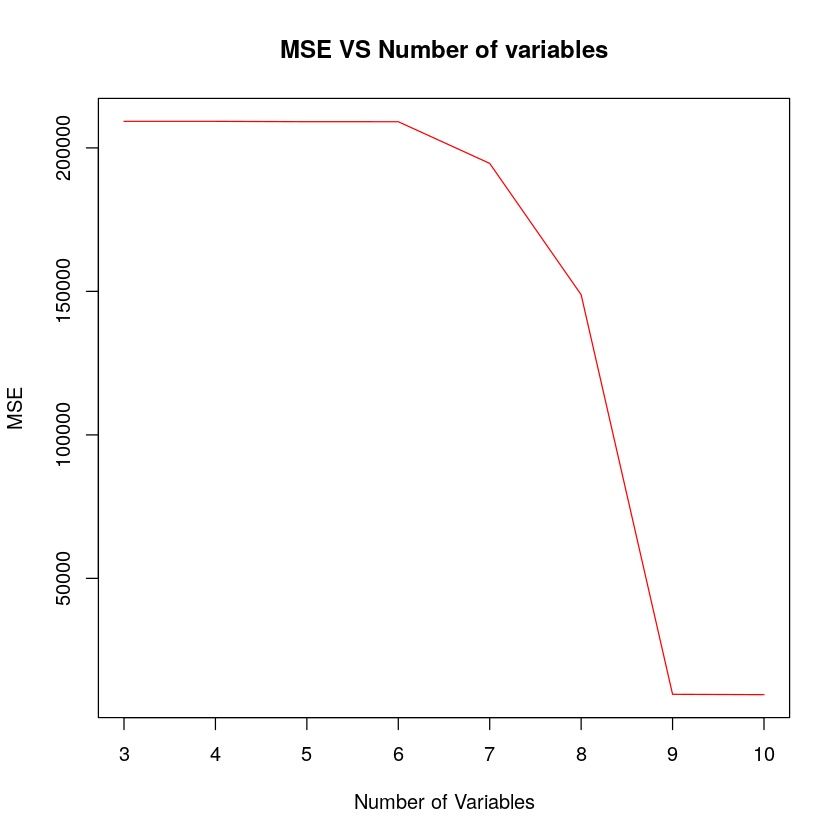

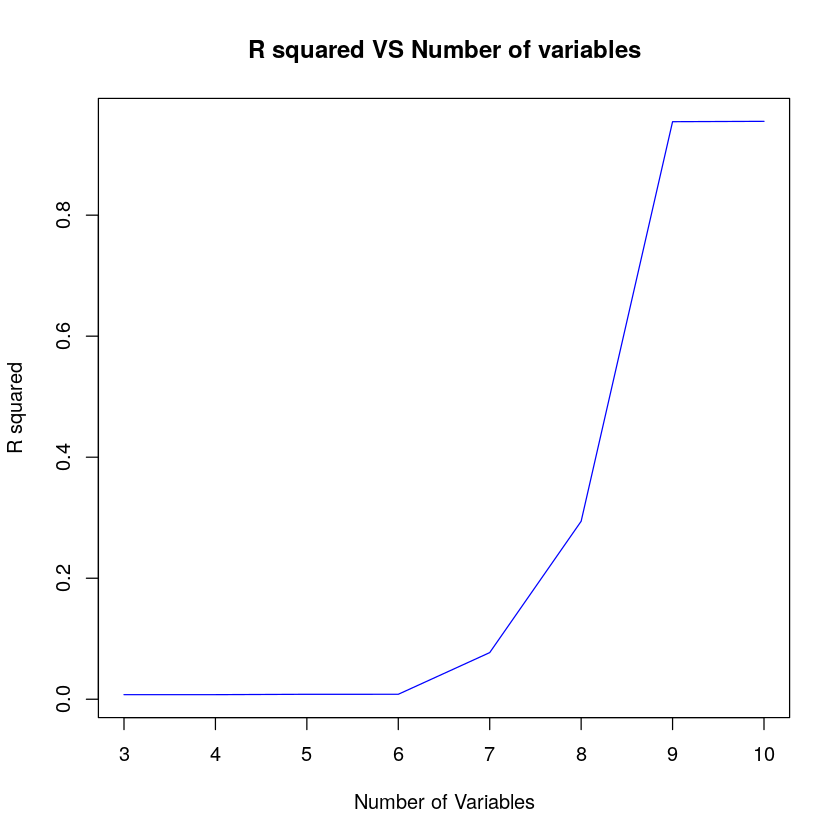

In [6]:
for (i in 3:10){ 
  pick <- variables[c(1:i)]
  data <- Credit[,c(pick)]
  reg <- lm(Credit$Balance ~. , data= data)
  r_squared[i-2] <- summary(reg)$r.squared
  y_hat <- predict(reg) ## By default use data
  mse[i-2] <-  mean((Credit$Balance - y_hat)^2)
}

## Define type"n" to be able then to draw a line

plot(cbind(c(3:10), mse), xlab="Number of Variables", ylab="MSE", main="MSE VS Number of variables", type="n")
lines(cbind(c(3:10), mse), col="red", cex=1.2)
plot(cbind(c(3:10), r_squared), xlab="Number of Variables", ylab="R squared", main="R squared VS Number of variables", type="n")
lines(cbind(c(3:10), r_squared), col="blue", cex=1.2)

### Exercise 2

In [7]:
## Set seeds to replicate the result

set.seed(123)

## Pick randomly 1/5th of observastions
ii <- sample(nrow(Credit), floor(nrow(Credit)/5))

## Built a test and training set

data.te <- Credit[ii, ]
data.tr <- Credit[-ii,]

## Do your regressions on the training set
reg1 <- lm(Balance ~ Income + Limit + Married, data= data.tr)
reg2 <- lm(Balance ~ Income + Limit + Married + Gender + Ethnicity + Age + Student, data= data.tr )

## Make your predictions on the test set

y <- data.te$Balance


mse1 <- mean((y - predict(reg1, data=data.te))^2)
mse2 <- mean((y - predict(reg2, data=data.te))^2)
print(mse1)
print(mse2)

[1] 353538.7
[1] 376461.7
